In [48]:
import sys
sys.path.insert(0,'../')
from libs.ssl_task import Classification
from tests.test_utils import SonarDataModule
import lightning as L
%load_ext autoreload
%autoreload 2
L.seed_everything(7)

Seed set to 7


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


7

In [50]:
datamodule = SonarDataModule(batch_size=16)
datamodule.prepare_data()
datamodule.setup('fit')

In [39]:
from lightning.pytorch.loggers import CSVLogger
import lightning as L
lit = Classification.ClassificationLit(
    encoder_path='tests.unit_tests.Wide',
    encoder_kwargs={},
    task='binary',
    num_classes=2,
    optimizer_path='torch.optim.Adam',
    optimizer_kwargs={'lr': 0.002, 'weight_decay': 0.001},
)

trainer = L.Trainer(max_epochs=50, max_steps=-1,
                    logger=CSVLogger(save_dir="."),
                    )
trainer.fit(lit, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type | Params | Mode 
-----------------------------------------
0 | encoder | Wide | 11.3 K | train
-----------------------------------------
11.3 K    Trainable params
0         Non-trainable params
11.3 K    Total params
0.045     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (11) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


,train_accuracy_epoch,train_f1_epoch,train_loss_epoch,val_Classifier/accuracy,val_Classifier/f1,val_Classifier/loss
epoch,,,,,,
0,NaN,NaN,NaN,0.365854,0.525816,0.732862
0,0.544910,0.112860,0.696972,NaN,NaN,NaN
1,NaN,NaN,NaN,0.731707,0.616566,0.630578
1,0.538922,0.676621,0.671545,NaN,NaN,NaN
2,NaN,NaN,NaN,0.682927,0.523651,0.587166


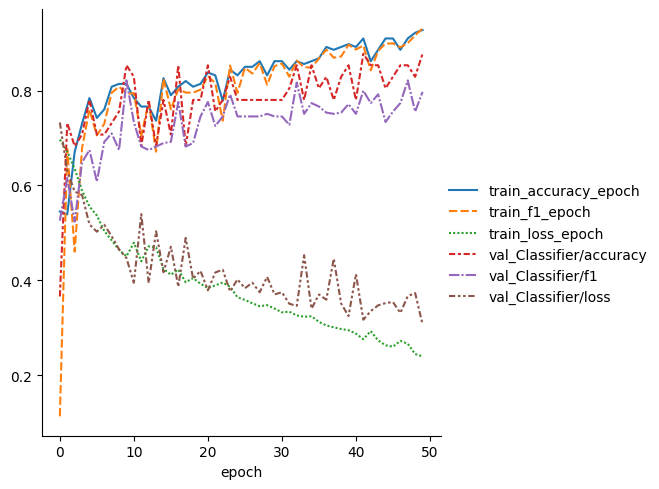

In [40]:
import pandas as pd
import seaborn as sn
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
# drop all columns start with "grad_2.0_norm"
for col in metrics.columns:
    if col.startswith("grad_2.0_norm") or "step" in col:
        del metrics[col]
# del metrics["step"]
metrics.set_index("epoch", inplace=True)
display(metrics.dropna(axis=1, how="all").head())
sn.relplot(data=metrics, kind="line")

In [41]:
metrics

,train_accuracy_epoch,train_f1_epoch,train_loss_epoch,val_Classifier/accuracy,val_Classifier/f1,val_Classifier/loss
epoch,,,,,,
0,NaN,NaN,NaN,0.365854,0.525816,0.732862
0,0.544910,0.112860,0.696972,NaN,NaN,NaN
1,NaN,NaN,NaN,0.731707,0.616566,0.630578
1,0.538922,0.676621,0.671545,NaN,NaN,NaN
2,NaN,NaN,NaN,0.682927,0.523651,0.587166
...,...,...,...,...,...,...
48,NaN,NaN,NaN,0.829268,0.755790,0.373011
48,0.922156,0.916731,0.244371,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
metrics.iloc[-1]

train_accuracy_epoch       0.928144
train_f1_epoch             0.931416
train_loss_epoch           0.239256
val_Classifier/accuracy         NaN
val_Classifier/f1               NaN
val_Classifier/loss             NaN
Name: 49, dtype: float64

In [45]:
metrics.iloc[-2]

train_accuracy_epoch            NaN
train_f1_epoch                  NaN
train_loss_epoch                NaN
val_Classifier/accuracy    0.878049
val_Classifier/f1          0.797444
val_Classifier/loss        0.306893
Name: 49, dtype: float64